In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df1= pd.read_csv('Laptop_Price.csv')
df1=df1.dropna()

In [19]:
from sklearn.preprocessing import LabelEncoder

names=df1.columns[df1.dtypes=='object']

# store encoders and mappings
encoders = {}
mappings = {}

# encode each column and store mappings
for col in names:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col].astype('str'))
    encoders[col] = le


# print mappings
for col, le in encoders.items():
    print(col,end=' {')
    for i in le.classes_:
        print(i,':',le.transform([i]),end=' ,')
    print('}')

**Linear Regression**

In [20]:
df1['Price_rs'] = df1['Price_euros']*96.63
x=df1.drop(['Price_rs','Price_euros','Product',],axis=1)
y=df1['Price_rs']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: -19628343.034909073
RMSE: 297775900.4369273


In [22]:
model.coef_

array([ 8.72502922e+02,  5.30495345e+03, -2.75939363e+03,  6.62040474e+03,
        7.35333739e+03,  5.52891587e+03,  3.52813839e+03, -9.55905041e-05,
        5.22989748e+01,  1.50584003e+04,  1.07728062e+03,  7.61380303e+03,
        1.86480601e+04,  2.56738839e+04,  4.44718746e+02, -1.49495511e+01,
       -1.59985817e+01,  1.90410359e+03, -1.02994443e+04,  9.12291791e+03,
        2.51449129e+02])

In [23]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error

y_pred=model.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

-19628343.034909073
8.867048688102286e+16
297775900.4369273
18602748.733208146
412.79759668691054


In [24]:
y_valid=model.predict(X_train)
print(r2_score(y_train,y_valid))
print(r2_score(y_test,y_pred))


0.7291992268810286
-19628343.034909073


<Axes: xlabel='Price_rs'>

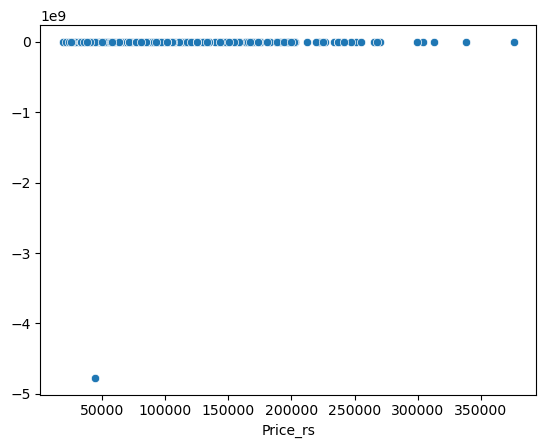

In [25]:
sns.scatterplot(x=y_test,y=y_pred)


<Axes: xlabel='Price_rs', ylabel='Price_rs'>

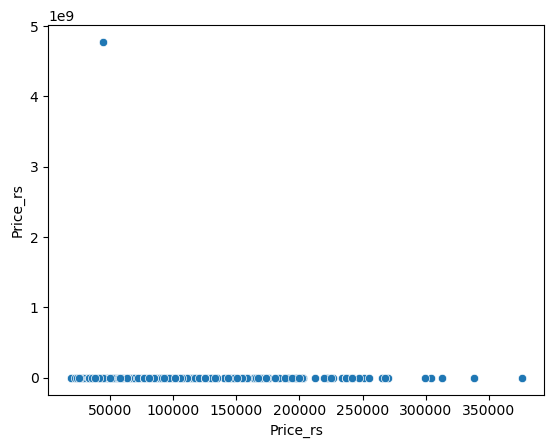

In [26]:
residuals=y_test-y_pred

sns.scatterplot(x=y_test, y=residuals)


**Logistic Regression**

In [27]:
y=df1['Touchscreen']
X=df1.drop('Touchscreen',axis=1)

In [28]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=32)

model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)



/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8715953307392996

In [29]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

y_pred= model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))


0.8715953307392996
0.5
0.030303030303030304
0.05714285714285714


Text(50.722222222222214, 0.5, 'Orginal')

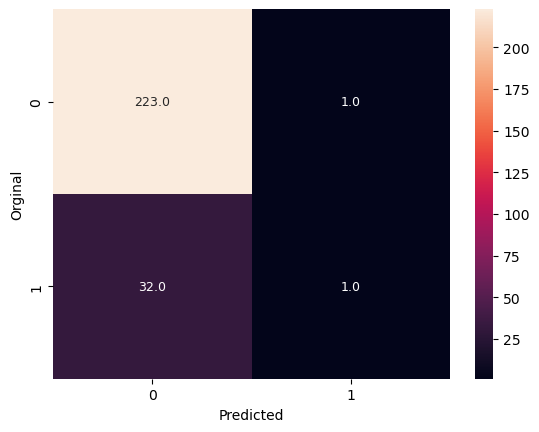

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".1f",annot_kws={"size": 9},)
plt.xlabel('Predicted')
plt.ylabel('Orginal')